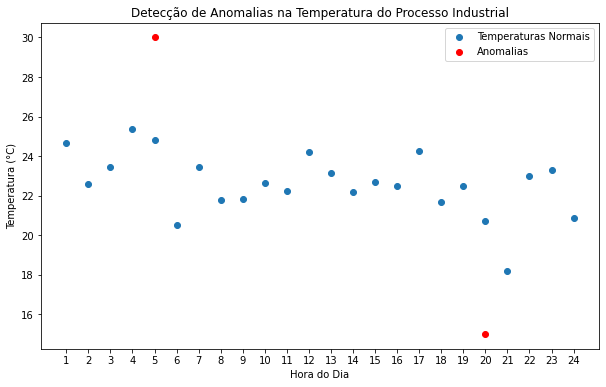

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simulando dados de temperatura ao longo de um dia (24 horas)
np.random.seed(0)
horas = np.arange(1, 25, 1)  # 1 a 24 horas
temperaturas = np.random.normal(22, 1.5, 24)  # Temperatura média de 22°C com desvio padrão

# Adicionando anomalias nos dados de temperatura
horas_anomalias = [5, 20]  # Anomalias às 5h e às 20h
temperaturas_anomalias = [30, 15]  # Temperatura de 30°C às 5h e 15°C às 20h

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(horas, temperaturas, label='Temperaturas Normais')
plt.scatter(horas_anomalias, temperaturas_anomalias, color='red', label='Anomalias')

# Adicionando títulos e legendas
plt.title('Detecção de Anomalias na Temperatura do Processo Industrial')
plt.xlabel('Hora do Dia')
plt.ylabel('Temperatura (°C)')
plt.xticks(np.arange(1, 25, 1))  # Marcando cada hora no eixo X para melhor visualização
plt.legend()

# Exibindo o gráfico
plt.show()


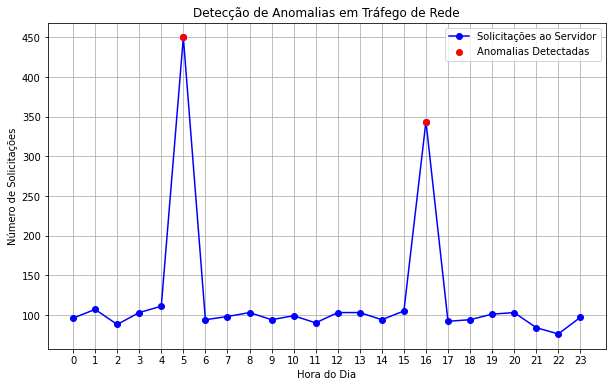

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Configurando a semente para reprodutibilidade
np.random.seed(42)

# Gerando dados de exemplo
horas = np.arange(24)  # 24 horas
solicitações_por_hora = np.random.poisson(100, 24)  # Uma média de 100 solicitações por hora

# Introduzindo anomalias (picos de solicitações que podem indicar ataques de DoS)
solicitações_por_hora[5] *= 5  # Pico anômalo às 5h
solicitações_por_hora[16] *= 4 # Pico anômalo às 16h

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(horas, solicitações_por_hora, marker='o', linestyle='-', color='blue', label='Solicitações ao Servidor')

# Destacando as anomalias
plt.scatter([5, 16], [solicitações_por_hora[5], solicitações_por_hora[16]], color='red', zorder=5, label='Anomalias Detectadas')

# Adicionando títulos e legendas
plt.title('Detecção de Anomalias em Tráfego de Rede')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Solicitações')
plt.xticks(horas)
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()


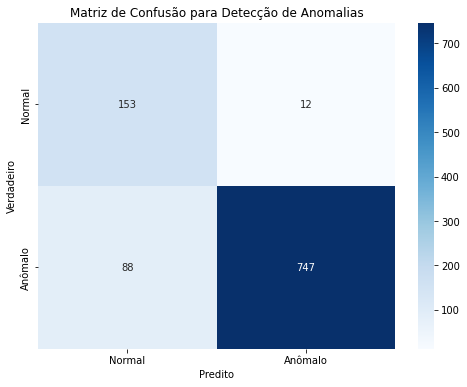

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simulando um cenário com 1000 observações
np.random.seed(0)
y_true = np.random.binomial(n=1, p=0.85, size=1000)  # ~15% de anomalias
y_pred = y_true.copy()

# Introduzindo erros (falsos positivos e falsos negativos) de forma aleatória
flip_indices = np.random.choice(np.arange(len(y_pred)), size=100, replace=False)
for idx in flip_indices:
    y_pred[idx] = 1 - y_pred[idx]  # Invertendo alguns valores para simular previsões incorretas

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anômalo"], yticklabels=["Normal", "Anômalo"])
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Matriz de Confusão para Detecção de Anomalias')
plt.show()


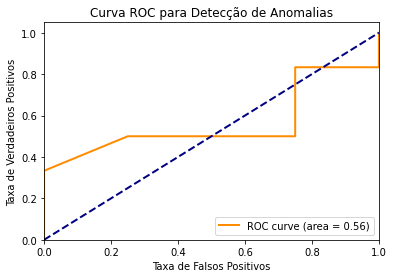

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Taxas sintéticas de verdadeiros positivos e falsos positivos
fpr, tpr, thresholds = roc_curve(y_true, [0.1, 0.4, 0.35, 0.8, 0.7, 0.9, 0.6, 0.55, 0.7, 0.2])
roc_auc = auc(fpr, tpr)

# Gerando o gráfico ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Detecção de Anomalias')
plt.legend(loc="lower right")
plt.show()


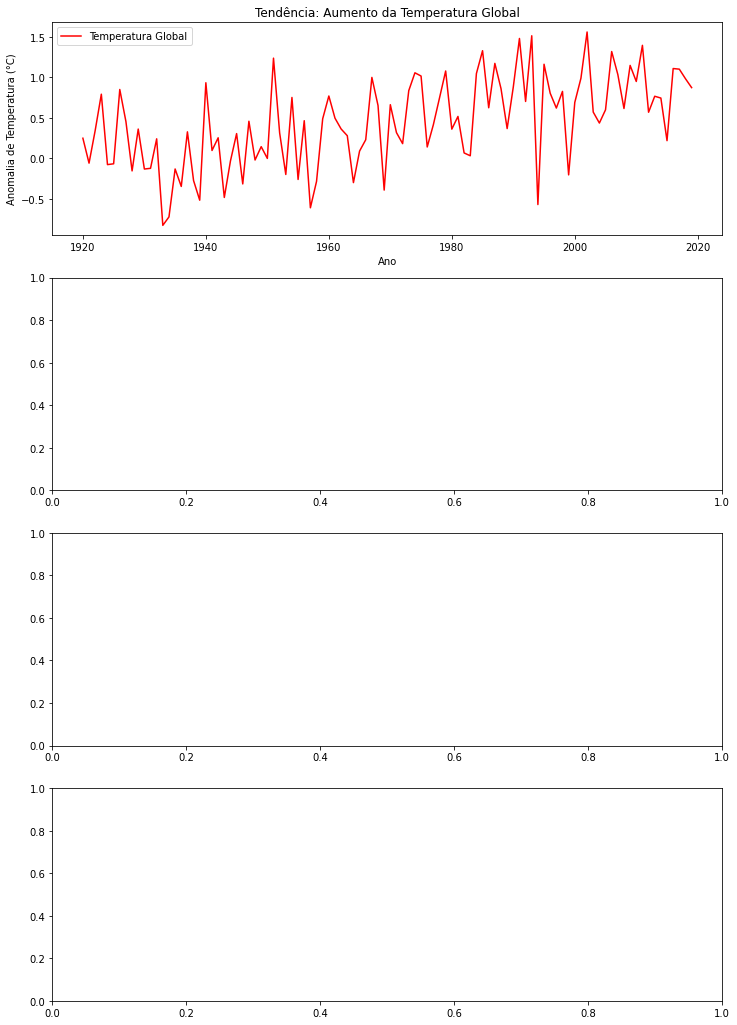

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Definindo os dados para cada exemplo
np.random.seed(42)

# Tendência: Aumento da Temperatura Global
anos = np.arange(1920, 2020)
temperatura = 0.01 * (anos - 1920) + np.random.normal(0, 0.5, len(anos))

# Sazonalidade: Vendas no Varejo durante o Ano
meses = np.arange(1, 13)
vendas = np.abs(np.sin(meses / 12 * 2 * np.pi) * 200 + np.random.normal(0, 25, len(meses)))

# Ciclos: Ciclos Econômicos (Simulação simplificada)
tempo = np.arange(1, 101)
ciclo_economico = np.sin(tempo / 10) * 50 + np.random.normal(0, 10, len(tempo)) + 100

# Ruído: Flutuações Diárias no Mercado de Ações
dias = np.arange(1, 31)
preco_acoes = np.random.normal(0, 1, len(dias)) + 100

# Plotando os gráficos
fig, axs = plt.subplots(4, 1, figsize=(12, 18))

# Tendência
axs[0].plot(anos, temperatura, label='Temperatura Global', color='red')
axs[0].set_title('Tendência: Aumento da Temperatura Global')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Anomalia de Temperatura (°C)')
axs[0].legend()

# Sazonalidade
axs[1].bar(meses, vendas, label='Vendas no Varejo', color='blue')
axs[1].set_title('Sazonalidade: Vendas no Varejo durante o Ano')
axs[1].set_xlabel('Mês')
axs[1].set_ylabel('Vendas')
axs[1].legend()

# Ciclos
axs[2].plot(tempo, ciclo_economico, label='Ciclo Econômico', color='green')
axs[2].set_title('Ciclos: Ciclos Econômicos')
axs[2].set_xlabel('Tempo')
axs[2].set_ylabel('PIB')
axs[2].legend()

# Ruído
axs[3].plot(dias, preco_acoes, label='Preço de Ações', color='purple')
axs[3].set_title('Ruído: Flutuações Diárias no Mercado de Ações')
axs[3].set_xlabel('Dia')
axs[3].set_ylabel('Preço')
axs[3].legend()

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [23]:
np.random.seed(42)
num_observacoes = 200
valores_transacao = np.random.rand(num_observacoes) * 1000  # Exemplo: transações até 1000 unidades monetárias

# Hora do dia (normalizada de 0 a 1 para simplificar, onde 1 pode representar 24h)
horas_dia = np.random.rand(num_observacoes) * 24

X_realista = np.column_stack((valores_transacao, horas_dia))

# Adicionando anomalias de maneira que ainda façam sentido no contexto de horas e valores de transação
X_anomalias = np.random.uniform(low=[500, 0.8], high=[1000, 1], size=(20, 2))  # Transações anormalmente altas em horários tardios
X_realista = np.vstack([X_realista, X_anomalias])


In [24]:
X_realista

array([[3.74540119e+02, 1.54087595e+01],
       [9.50714306e+02, 2.01935916e+00],
       [7.31993942e+02, 3.87908914e+00],
       [5.98658484e+02, 2.15653005e+01],
       [1.56018640e+02, 1.45542974e+01],
       [1.55994520e+02, 2.20729239e-01],
       [5.80836122e+01, 2.43531703e+00],
       [8.66176146e+02, 1.59240425e+01],
       [6.01115012e+02, 1.21478012e-01],
       [7.08072578e+02, 3.85939323e+00],
       [2.05844943e+01, 1.31696109e+01],
       [9.69909852e+02, 1.66054847e+01],
       [8.32442641e+02, 1.56470702e+01],
       [2.12339111e+02, 5.38246343e+00],
       [1.81824967e+02, 1.70923013e+01],
       [1.83404510e+02, 5.69397810e+00],
       [3.04242243e+02, 7.80959276e+00],
       [5.24756432e+02, 1.79157937e+01],
       [4.31945019e+02, 1.55911896e+01],
       [2.91229140e+02, 2.03813619e+01],
       [6.11852895e+02, 1.57827094e+01],
       [1.39493861e+02, 1.36394065e+01],
       [2.92144649e+02, 2.24819443e+00],
       [3.66361843e+02, 8.82517927e+00],
       [4.560699

In [25]:
modelo_if = IsolationForest(n_estimators=100, contamination='auto', random_state=42)


In [26]:
modelo_if.fit(X_realista)


IsolationForest(random_state=42)

In [27]:
scores_pred = modelo_if.decision_function(X_realista)
anomalias_pred = modelo_if.predict(X_realista)


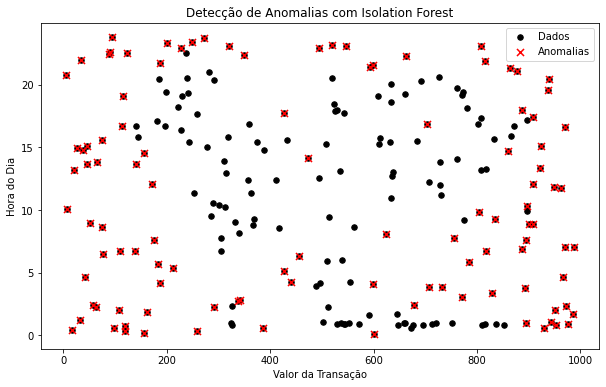

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X_realista[:, 0], X_realista[:, 1], color='k', s=30, marker='o', label='Dados')
plt.scatter(X_realista[anomalias_pred == -1, 0], X_realista[anomalias_pred == -1, 1], color='red', s=50, marker='x', label='Anomalias')
plt.title('Detecção de Anomalias com Isolation Forest')
plt.xlabel('Valor da Transação')
plt.ylabel('Hora do Dia')
plt.legend()
plt.show()


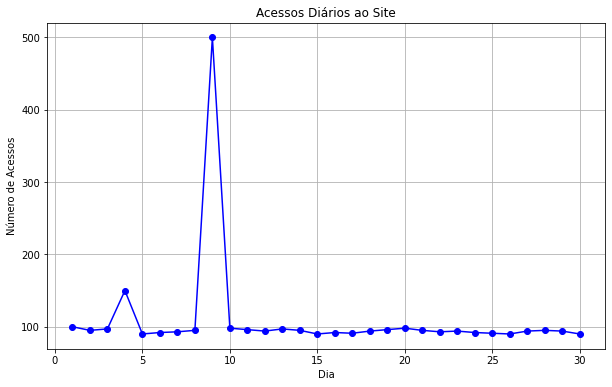

In [29]:
import matplotlib.pyplot as plt

# Dados dos dias e acessos
dias = list(range(1, 31))
acessos = [100, 95, 97, 150, 90, 92, 93, 95, 500, 98, 96, 94, 97, 95, 90, 92, 91, 94, 96, 98, 95, 93, 94, 92, 91, 90, 94, 95, 94, 90]

# Plotagem do gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(dias, acessos, marker='o', color='blue', linestyle='-')
plt.title('Acessos Diários ao Site')
plt.xlabel('Dia')
plt.ylabel('Número de Acessos')
plt.grid(True)
plt.show()


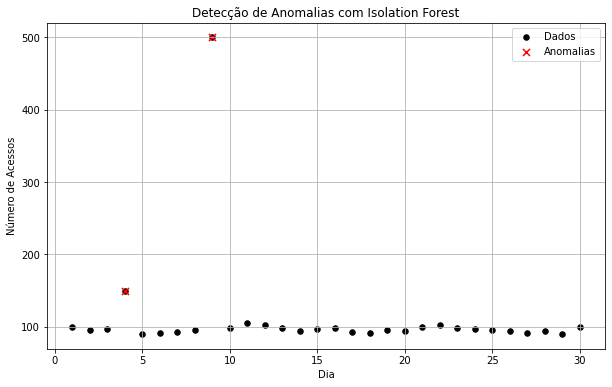

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Dados de entrada: dias e acessos
dias = np.arange(1, 31)
acessos = [100, 95, 97, 150, 90, 92, 93, 95, 500, 98, 105, 102, 98, 94, 97, 98, 93, 92, 95, 94, 100, 102, 98, 97, 95, 94, 92, 94, 90, 100]

dados = np.array([[dia, acesso] for dia, acesso in zip(dias, acessos)])

# Criando o modelo Isolation Forest
modelo_iforest = IsolationForest(contamination=0.05, random_state=42)

# Treinando o modelo
modelo_iforest.fit(dados)

# Prevendo anomalias (outliers)
scores_pred = modelo_iforest.decision_function(dados)
anomalias = modelo_iforest.predict(dados)

plt.figure(figsize=(10, 6))
plt.scatter(dados[:, 0], dados[:, 1], color='k', s=30, marker='o', label='Dados')
plt.scatter(dados[anomalias == -1, 0], dados[anomalias == -1, 1], color='red', s=50, marker='x', label='Anomalias')
plt.title('Detecção de Anomalias com Isolation Forest')
plt.xlabel('Dia')
plt.ylabel('Número de Acessos')
plt.legend()
plt.grid(True)
plt.show()
